In [86]:
import face_recognition # import face recognition library
import matplotlib.pyplot as plt # import matplotlib plot
import matplotlib.image as mpimg # import matplotlib image
import matplotlib.patches as patches # import matplotlib patch drawing
from PIL import Image # import python image processing library

7 face(s) detected
[(101, 55, 153, 3), (61, 233, 113, 181), (86, 569, 122, 533), (53, 681, 115, 619), (46, 469, 82, 433), (42, 385, 78, 349), (122, 305, 158, 269)]


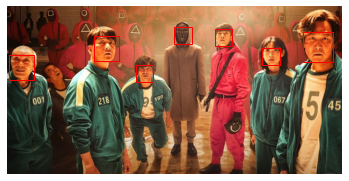

In [129]:
workdir = "./"
filename = "Squid-game-poster2.jpg"

img_path = workdir + filename # image path assignment

image = face_recognition.load_image_file(img_path)
face_locations_all = face_recognition.face_locations(image)
face_encodings_all = face_recognition.face_encodings(image, num_jitters=5)

# results = face_recognition.compare_faces([face_encodings_all], unknown_encoding)
# face_locations_all = face_recognition.face_locations(image, model="cnn")

print(str(len(face_locations_all)) + " face(s) detected")
print(face_locations_all)

figure_original, ax_original = plt.subplots() # create figure
face_regions = [0]*len(face_locations_all) # populate array for the rectangles to be drawn around the recognized faces

for i in range(len(face_regions)): # add red rectangles according to the coordinates
    face_regions[i] = patches.Rectangle((face_locations_all[i][3],face_locations_all[i][0]),abs(face_locations_all[i][2]-face_locations_all[i][0]),abs(face_locations_all[i][3]-face_locations_all[i][1]), edgecolor='r', facecolor="none")
    
    # comment the lines below for deactivating clipping
    # fig_temp = figure_original
    # ax_temp = ax_original
    # ax_temp.imshow(image).set_clip_path(face_regions[i])
    # fig_temp.savefig(filename + "face_" + str(i) + "_clipped.jpg")

matplotlib_image = mpimg.imread(img_path)
ax_original.set_axis_off() # this removes the axis from the photo

for i in range(len(face_locations_all)):
    ax_original.add_patch(face_regions[i])

ax_original.imshow(matplotlib_image)


# export the face-detected photos into files
save_all_filename = filename[slice(-4)] + "_faces_all.jpg"
figure_original.savefig(save_all_filename, dpi=150, bbox_inches="tight")
# for i in range(len(face_regions)):
#     image = cv2.imread(img_path)
#     face_cropped = img[10:20, 10:20]


In [88]:
PIL_image = Image.open(img_path)
print(PIL_image.size)

# PIL has (left, top, right, bottom) system. This constructs a rectangle from (left, top) coordinate to (right, bottom) coordinate
# face-recognition has (top, right, bottom, left) system. This constructs a rectangle from (top, right) to (bottom, left) coordinate

def coord_transform_face_rec_to_PIL(coord_face_recognition):
    # from (top, right, bottom, left) system to (left, top, right, bottom) system
    (top, right, bottom, left) = coord_face_recognition
    coord_PIL = (left, top, right, bottom)
    return coord_PIL

# print(coord_transform_face_rec_to_PIL((188, 895, 239, 844)))

save_face_filename = filename[slice(-4)] + "_face.jpg"

for i in range(len(face_locations_all)):
    img_cropped = PIL_image.crop(coord_transform_face_rec_to_PIL(face_locations_all[i]))
    # img_cropped.show()
    img_cropped.save(filename[slice(-4)] + "_face_" + str(i) + ".jpg")

(700, 350)


In [64]:
"abcde"[slice(-3)]

'ab'

In [130]:
known_faces = face_encodings_all

unknown_image = face_recognition.load_image_file("Squid-Game-poster.jpg")
face_locations_unknown_image = face_recognition.face_locations(unknown_image)
face_encodings_unknown_image = face_recognition.face_encodings(unknown_image)


In [131]:
face_recognition.compare_faces(known_faces, face_encodings_unknown_image[0])


[False, True, False, True, False, False, False]

In [132]:
face_recognition.face_distance(known_faces, face_encodings_unknown_image[0])

array([0.79074864, 0.53881648, 0.65803916, 0.37993952, 0.65454382,
       0.62542463, 0.7603065 ])